# Análise exploratória de dados

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## 1. Coleta de dados

In [12]:
data = pd.read_csv('preprocessedTEC.csv')

In [13]:
data.head()

,Carga Horária,Categoria da Situação,Código da Matrícula,Cor/Raça,Data de Início do Ciclo,Data de Fim Previsto do Ciclo,Eixo Tecnológico,Faixa Etária,Fator Esforço Curso,Idade,Instituição,Mês de Ocorrência da Situação,Nome de Curso,Região,Renda Familiar,Sexo,Tipo de Curso,Turno,UF,Unidade de Ensino
0,843,Evadidos,64063206,Preta,04/02/2015,15/07/2016,Gestão e Negócios,45 a 49 anos,1.10,48.0,IFSP,01/07/2019,Técnico em Administração,Região Sudeste,"0<RFP<=0,5",Masculino,Técnico,Noturno,SP,Campus Presidente Epitácio
1,1203,Evadidos,64064144,Parda,04/02/2015,20/12/2016,Infraestrutura,20 a 24 anos,1.30,22.0,IFSP,01/08/2019,Técnico em Edificações,Região Sudeste,Não declarada,Feminino,Técnico,Noturno,SP,Campus Presidente Epitácio
2,3600,Evadidos,64095768,Não declarada,19/02/2015,19/02/2019,Ambiente e Saúde,15 a 19 anos,1.16,19.0,IFSUL,01/07/2019,Técnico em Controle Ambiental,Região Sul,"0<RFP<=0,5",Feminino,Técnico,Matutino,RS,Campus Camaquã
3,3600,Concluintes,64094201,Não declarada,19/02/2015,19/02/2019,Ambiente e Saúde,20 a 24 anos,1.16,20.0,IFSUL,01/08/2019,Técnico em Controle Ambiental,Região Sul,Não declarada,Feminino,Técnico,Matutino,RS,Campus Camaquã
4,3600,Concluintes,64094245,Não declarada,19/02/2015,19/02/2019,Ambiente e Saúde,15 a 19 anos,1.16,18.0,IFSUL,01/04/2019,Técnico em Controle Ambiental,Região Sul,Não declarada,Feminino,Técnico,Matutino,RS,Campus Camaquã


In [14]:
data.columns.values

array(['Carga Horária', 'Categoria da Situação', 'Código da Matrícula',
       'Cor/Raça', 'Data de Início do Ciclo',
       'Data de Fim Previsto do Ciclo', 'Eixo Tecnológico',
       'Faixa Etária', 'Fator Esforço Curso', 'Idade', 'Instituição',
       'Mês de Ocorrência da Situação', 'Nome de Curso', 'Região',
       'Renda Familiar', 'Sexo', 'Tipo de Curso', 'Turno', 'UF',
       'Unidade de Ensino'], dtype=object)

In [15]:
data['Nome de Curso'].unique()

array(['Técnico em Administração', 'Técnico em Edificações',
       'Técnico em Controle Ambiental', 'Técnico em Eletromecânica',
       'Técnico em Eletrotécnica', 'Técnico em Informática',
       'Técnico em Automação Industrial',
       'Técnico em Desenho de Construção Civil', 'Técnico em Logística',
       'Técnico em Segurança do Trabalho', 'Técnico em Mecatrônica',
       'Técnico em Agropecuária', 'Técnico em Florestas',
       'Técnico em Geologia', 'Técnico em Comércio Exterior',
       'Técnico em Secretariado', 'Técnico em Alimentos',
       'Técnico em Química', 'Técnico em Aquicultura',
       'Técnico em Eletrônica', 'Técnico em Mineração',
       'Técnico em Recursos Humanos', 'Técnico em Hospedagem',
       'Técnico em Agroecologia', 'Técnico em Informática para Internet',
       'Técnico em Produção de Moda', 'Técnico em Eventos',
       'Técnico em Artes Circenses', 'Técnico em Portos',
       'Técnico em Enfermagem', 'Técnico em Análises Clínicas',
       'Técnico e

In [17]:
# data = pd.read_csv('../data/processed/preprocessingTEC.csv')
# data

In [18]:
data=data[data['Faixa Etária']!='S/I']
data=data[data['Turno']!='Não se aplica']
data=data[data['Sexo']!='S/I']
data=data[data['Idade']>10]

## 2. Descrição dos dados





### 2.1. Dicionário de dados

In [12]:
dicionario = pd.read_csv('../data/external/dicionario.csv', sep=',')
dicionario

,Variável,Significado,Tipo,Subtipo
0,Carga Horária,Carga horária do ciclo de matrícula.,Quantitativa,Discreta
1,Categoria da Situação,"Situações de matrícula: concluintes, em curso ...",Qualitativa,Nominal
2,Código da Matrícula,Código da matrícula.,Quantitativa,Discreta
3,Cor/Raça,Cor/Raça do aluno.,Qualitativa,Nominal
4,Data de Início do Ciclo,Data de início do ciclo de matrícula.,Quantitativa,Discreta
5,Data de Fim Previsto do Ciclo,Data prevista para o final do ciclo de matrícula.,Quantitativa,Discreta
6,Faixa Etária,Agrupamento baseado na idade dos estudantes.,Qualitativa,Ordinal
7,Fator Esforço Curso,Ajusta a contagem de matrículas-equivalentes p...,Quantitativa,Continua
8,Idade,Idade do estudante.,Quantitativa,Discreta
9,Instituição,Sigla da Instituição.,Qualitativa,Nominal


In [13]:
#data.select_dtypes(include='object')

In [14]:
data.columns

Index(['Carga Horária', 'Categoria da Situação', 'Código da Matrícula',
       'Cor/Raça', 'Data de Início do Ciclo', 'Data de Fim Previsto do Ciclo',
       'Faixa Etária', 'Fator Esforço Curso', 'Idade', 'Instituição',
       'Mês de Ocorrência da Situação', 'Região', 'Renda Familiar', 'Sexo',
       'Turno', 'UF', 'Unidade de Ensino'],
      dtype='object')

In [15]:
data['UF'].unique()

array(['RS', 'AL', 'PR', 'MT', 'BA', 'AP', 'RN', 'RJ', 'SP', 'DF', 'PE',
       'TO', 'ES', 'AM', 'MG', 'SC', 'RR', 'GO', 'MA', 'CE', 'PB', 'PI',
       'PA', 'SE', 'MS', 'RO', 'AC'], dtype=object)

In [16]:
categorica = data.select_dtypes(include='object')

In [17]:
numerica = data.select_dtypes(exclude='object')

## 3. Perguntas de partida e hipóteses

### Qual a distribuição dos dados (variável por variável)?

In [18]:
data.describe(include='all')

,Carga Horária,Categoria da Situação,Código da Matrícula,Cor/Raça,Data de Início do Ciclo,Data de Fim Previsto do Ciclo,Faixa Etária,Fator Esforço Curso,Idade,Instituição,Mês de Ocorrência da Situação,Região,Renda Familiar,Sexo,Turno,UF,Unidade de Ensino
count,166140.000000,166140,1.661400e+05,166140,166140,166140,166140,166140.00000,166140.000000,166140,166140,166140,166140,166140,166140,166140,166140
unique,NaN,2,NaN,6,955,1184,11,NaN,NaN,51,508,5,7,2,4,27,552
top,NaN,Concluintes,NaN,parda,2018-02-05,2019-12-20,15 a 19 anos,NaN,NaN,IFRN,2019-12-01,Região Nordeste,Não declarada,Masculino,Integral,MG,Unidade Belo Horizonte
freq,NaN,114416,NaN,63709,12964,13732,130199,NaN,NaN,8730,25235,54353,61272,86364,91328,19061,1911
mean,3777.993096,NaN,7.719327e+07,NaN,NaN,NaN,NaN,1.15618,18.642278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,524.051297,NaN,1.095186e+07,NaN,NaN,NaN,NaN,0.10188,2.160952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,800.000000,NaN,3.410000e+02,NaN,NaN,NaN,NaN,1.00000,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3467.000000,NaN,6.734609e+07,NaN,NaN,NaN,NaN,1.05300,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3743.000000,NaN,7.250303e+07,NaN,NaN,NaN,NaN,1.18300,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4040.000000,NaN,8.554955e+07,NaN,NaN,NaN,NaN,1.25000,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
data ['UF'].unique()

array(['RS', 'AL', 'PR', 'MT', 'BA', 'AP', 'RN', 'RJ', 'SP', 'DF', 'PE',
       'TO', 'ES', 'AM', 'MG', 'SC', 'RR', 'GO', 'MA', 'CE', 'PB', 'PI',
       'PA', 'SE', 'MS', 'RO', 'AC'], dtype=object)

##### Distribuição das variáveis qualitativas

In [20]:
sns.set_theme(style="whitegrid")

In [21]:
# ax= sns.countplot(categorica,y='Faixa Etária')
# ax.bar_label(ax.containers[0])
# plt.show()

In [22]:
# plt.figure(figsize=(10, 6))
# ax= sns.countplot(categorica,x='Região',hue='Categoria da Situação')
# ax.bar_label(ax.containers[0])
# ax.bar_label(ax.containers[1])
# plt.title("Distribuição de evadidos x concluintes (Entre os anos de 2019 e 2021)",
#           fontweight='bold')
# plt.show()

In [22]:
sns.set_theme(style="whitegrid")

In [19]:
def show_bars(subplot_value, x_value, hue_value, dataset, palette='plasma', order=None):
    plt.subplot(subplot_value)
    ax = sns.countplot(x = x_value, hue = hue_value, data = dataset,palette=palette, order=order)
    # ax.set(xlabel = x_value, ylabel = 'Quantidade e Percentual')
    x_value = x_value.replace('_',' ')
    x_value = x_value.replace(x_value[0],x_value[0].upper())
    ax.set_xlabel(x_value, fontsize=15)
    ax.set_ylabel("Quantidade e Percentual", fontsize=15)
    #ax.spines['right'].set_visible(False)
    #ax.spines['top'].set_visible(False)
    #ax.spines['left'].set_visible(True)
    #ax.spines['bottom'].set_visible(True)
    ax.legend(fontsize=15)
    
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    
    for bars in ax.containers:
        for x, p in enumerate(bars):
            total = sum(xgroup[x] for xgroup in all_heights) 
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(f'{p.get_height()}\n{percentage}', (p.get_x() + p.get_width() / 2, p.get_height()), size=12, ha='center', va='bottom')
   

    x_ticks = [item.get_text() for item in ax.get_xticklabels()]
    if len(x_ticks[0]) > 10:
        ax.set_xticklabels(x_ticks, rotation=45, fontsize=12)
    else:
        ax.set_xticklabels(x_ticks, fontsize=12)

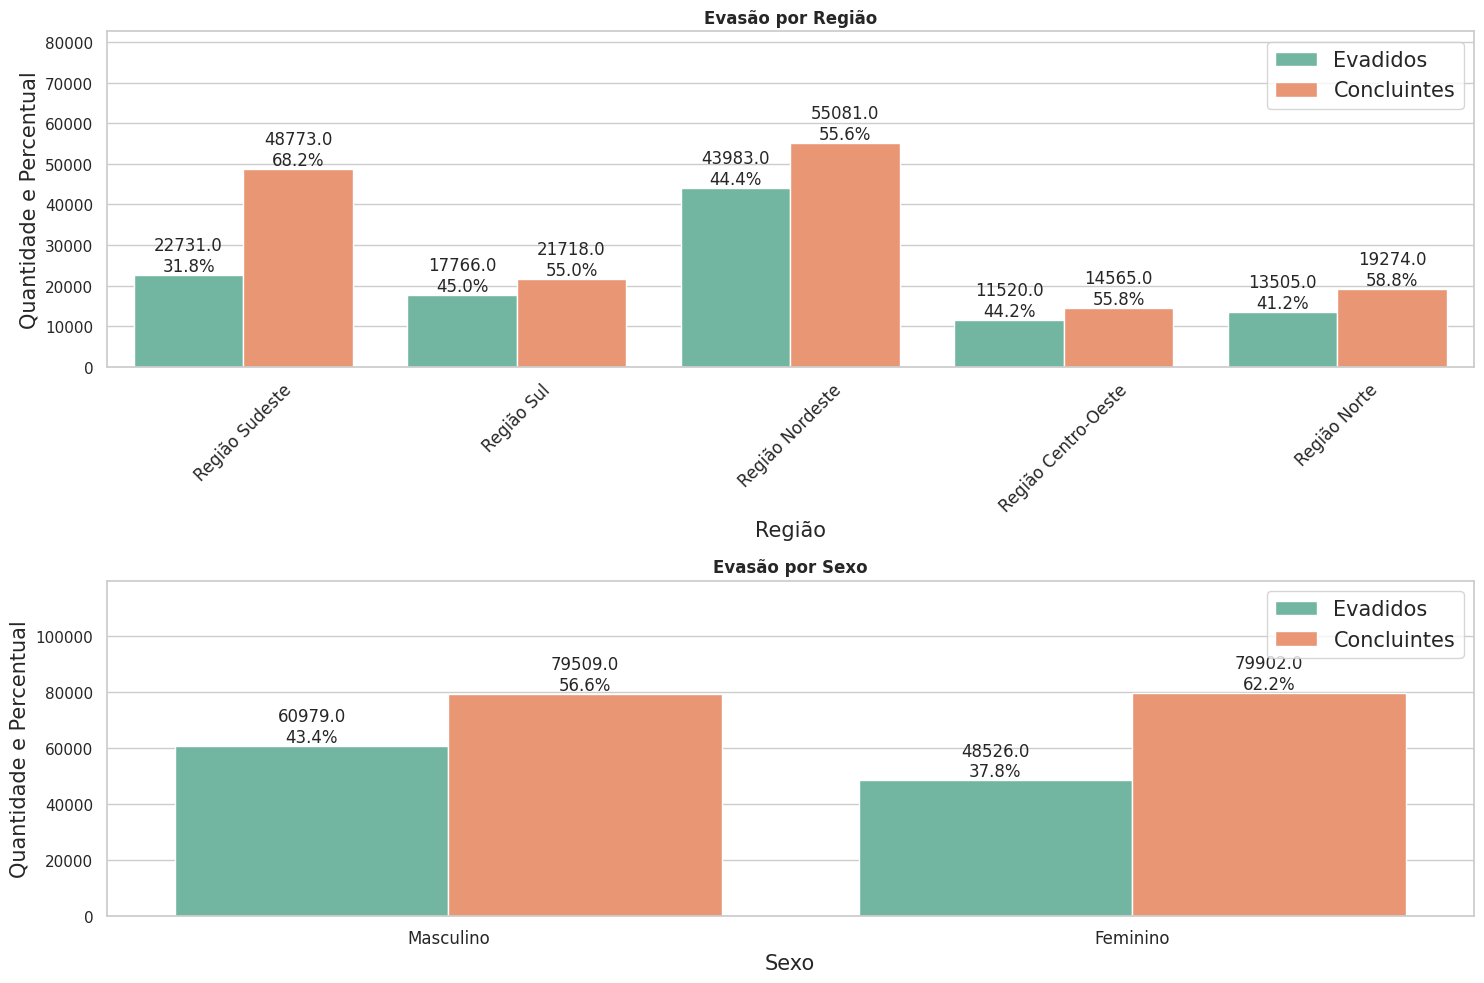

In [23]:
plt.figure(figsize=(15, 10))
show_bars(211, 'Região', 'Categoria da Situação', data, palette='Set2')
plt.title('Evasão por Região',fontweight='bold')
plt.margins(y=0.5)  
show_bars(212, 'Sexo', 'Categoria da Situação', data, palette='Set2')
plt.title('Evasão por Sexo',fontweight='bold')
plt.margins(y=0.5)  
plt.tight_layout()

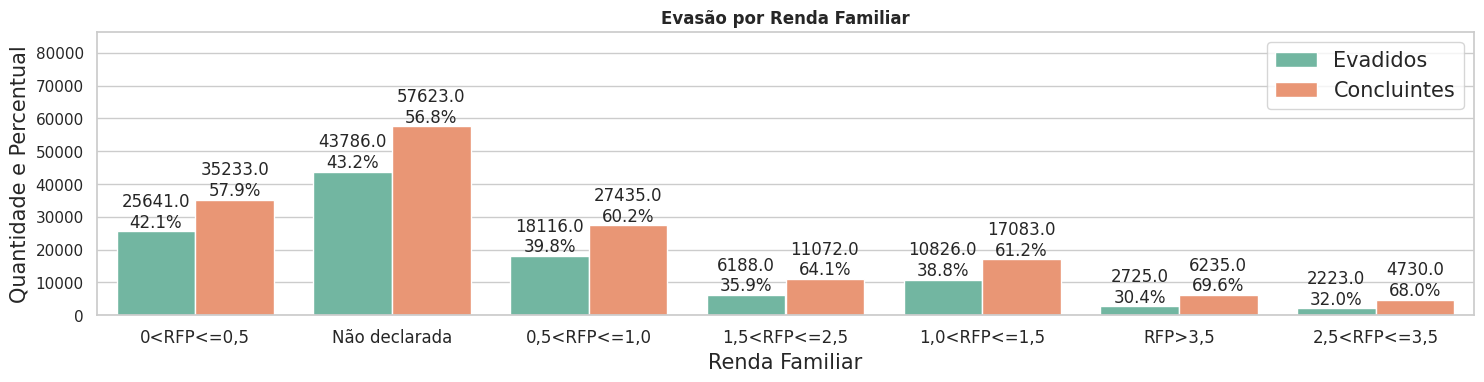

In [25]:
plt.figure(figsize=(15, 7))
show_bars(211, 'Renda Familiar', 'Categoria da Situação', data, palette='Set2')
plt.title('Evasão por Renda Familiar',fontweight='bold')
plt.margins(y=0.5)  
plt.tight_layout()

In [27]:
data['Cor/Raça'] = data['Cor/Raça'].str.lower()

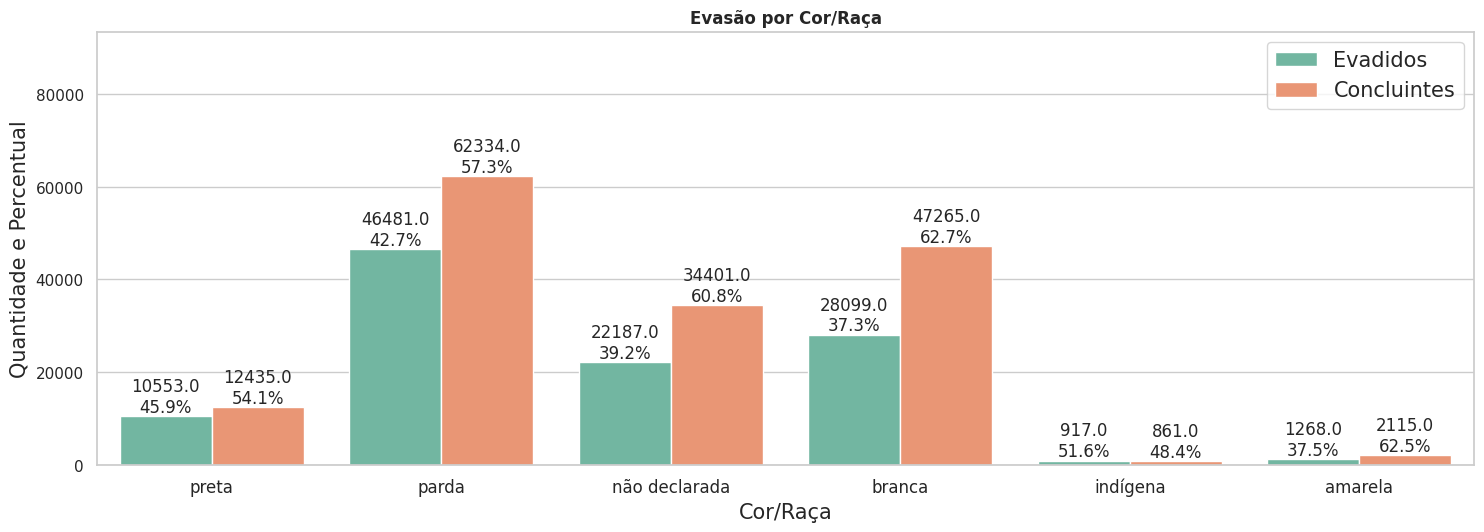

In [28]:
plt.figure(figsize=(15, 10))
show_bars(211, 'Cor/Raça', 'Categoria da Situação', data, palette='Set2')
plt.title('Evasão por Cor/Raça',fontweight='bold')
plt.margins(y=0.5)  
plt.tight_layout()

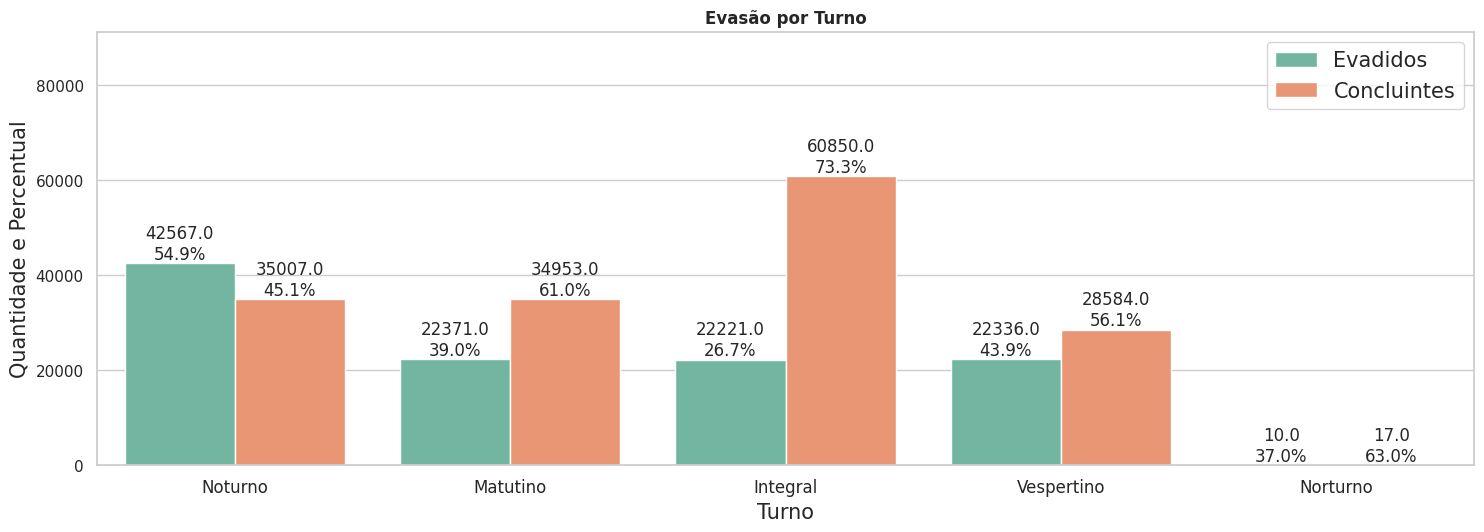

In [29]:
plt.figure(figsize=(15, 10))
show_bars(212, 'Turno', 'Categoria da Situação', data, palette='Set2')
plt.title('Evasão por Turno',fontweight='bold')
plt.margins(y=0.5)  
plt.tight_layout()

In [28]:
categorica['Faixa Etária'].unique()

array(['15 a 19 anos', '20 a 24 anos', '25 a 29 anos', '40 a 44 anos',
       '30 a 34 anos', '35 a 39 anos', '55 a 59 anos', 'Maior de 60 anos',
       '50 a 54 anos', '45 a 49 anos', 'Menor de 14 anos'], dtype=object)

In [31]:
faixa_ate_29anos = data[data['Faixa Etária'].isin(['15 a 19 anos', '20 a 24 anos','25 a 29 anos'])]

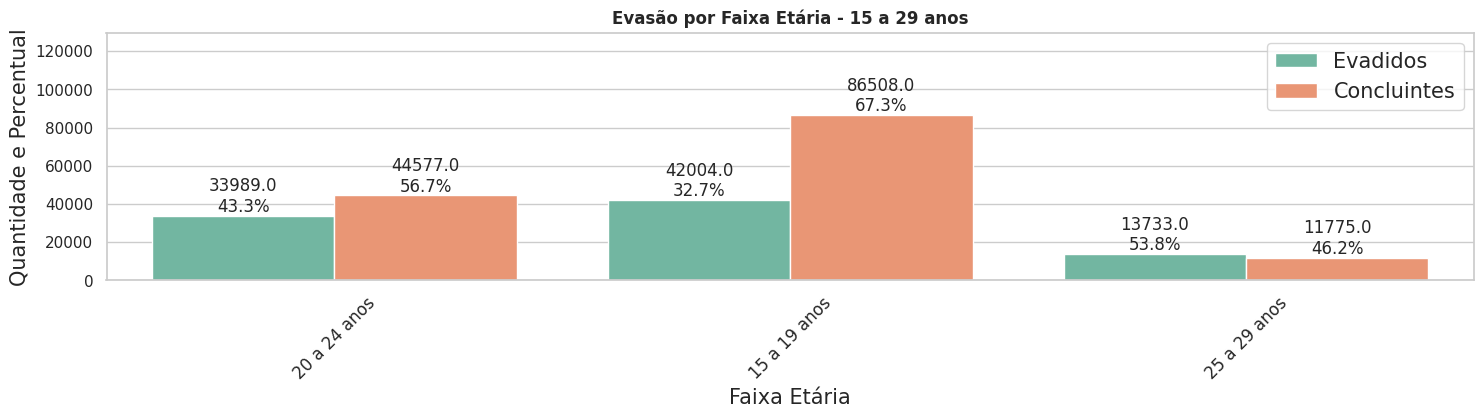

In [35]:
plt.figure(figsize=(15, 7))
show_bars(211, 'Faixa Etária', 'Categoria da Situação', faixa_ate_29anos, palette='Set2')
plt.title('Evasão por Faixa Etária - 15 a 29 anos',fontweight='bold')
plt.margins(y=0.5)  
plt.tight_layout()

In [33]:
faixa_acima_29anos = data[data['Faixa Etária'].isin(['30 a 34 anos', '35 a 39 anos', '55 a 59 anos', 'Maior de 60 anos',
       '50 a 54 anos', '45 a 49 anos'])]

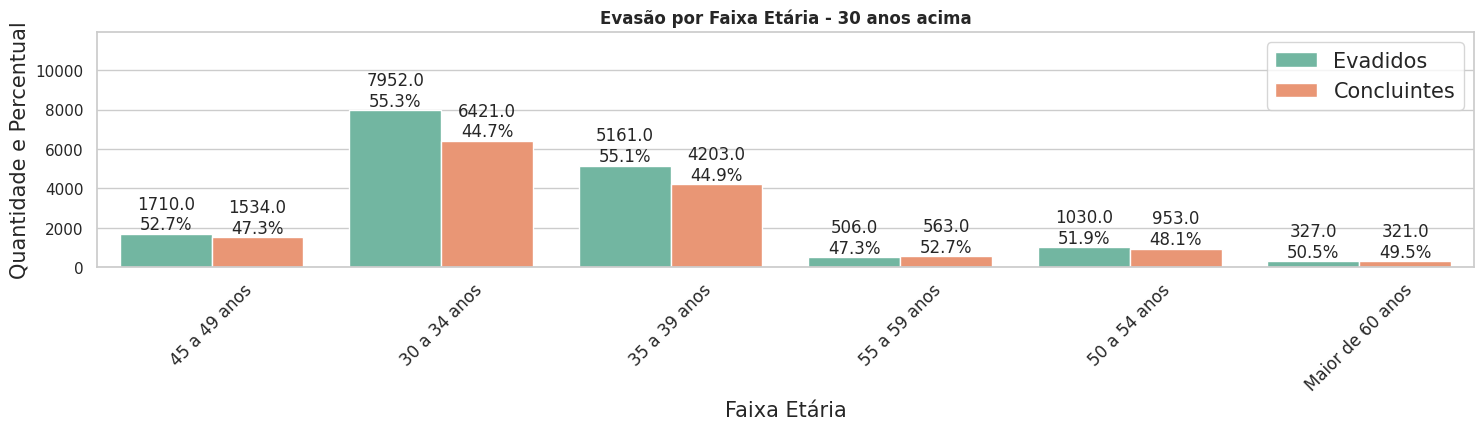

In [34]:
plt.figure(figsize=(15, 7))
show_bars(211, 'Faixa Etária', 'Categoria da Situação', faixa_acima_29anos, palette='Set2')
plt.title('Evasão por Faixa Etária - 30 anos acima',fontweight='bold')
plt.margins(y=0.5)  
plt.tight_layout()

In [89]:
aux = pd.crosstab(data['Nome de Curso'],data['Categoria da Situação'], normalize='index').reset_index().sort_values('Evadidos', ascending=False)
aux = aux[aux['Evadidos']<1.000000]
top10mais  = aux.head(10)
top10menos = aux.tail(10)

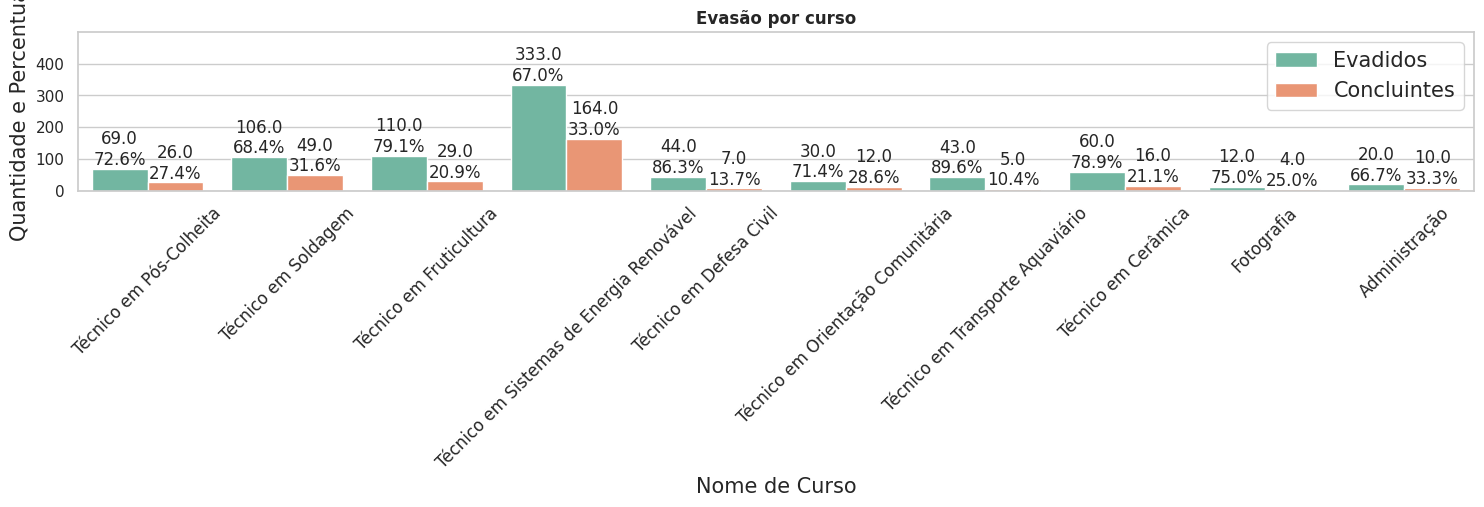

In [96]:
plt.figure(figsize=(15, 7))
show_bars(211, 'Nome de Curso', 'Categoria da Situação',data[data['Nome de Curso'].isin(top10mais['Nome de Curso'])], palette='Set2')
plt.title('Evasão por curso',fontweight='bold')
plt.margins(y=0.5)  
plt.tight_layout()

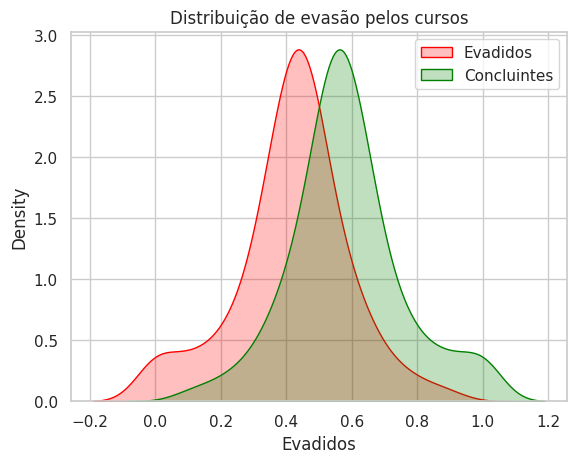

In [114]:
sns.kdeplot(aux2['Evadidos'], fill=True, label='Evadidos', color='red')
sns.kdeplot(aux2['Concluintes'],fill=True, label='Concluintes', color='green')
plt.title('Distribuição de evasão pelos cursos')
plt.legend()

In [105]:
aux2

Categoria da Situação,Nome de Curso,Concluintes,Evadidos
144,Técnico em Transporte Aquaviário,0.104167,0.895833
47,Técnico em Defesa Civil,0.137255,0.862745
67,Técnico em Fruticultura,0.208633,0.791367
33,Técnico em Cerâmica,0.210526,0.789474
3,Fotografia,0.250000,0.750000
...,...,...,...
72,Técnico em Gerência de Saúde,1.000000,0.000000
123,Técnico em Reciclagem,1.000000,0.000000
2,Aquicultura,1.000000,0.000000
31,Técnico em Cenografia,1.000000,0.000000


In [115]:
aux2['Evadidos'].describe()

count    151.000000
mean       0.418157
std        0.171972
min        0.000000
25%        0.346889
50%        0.436364
75%        0.504893
max        0.895833
Name: Evadidos, dtype: float64

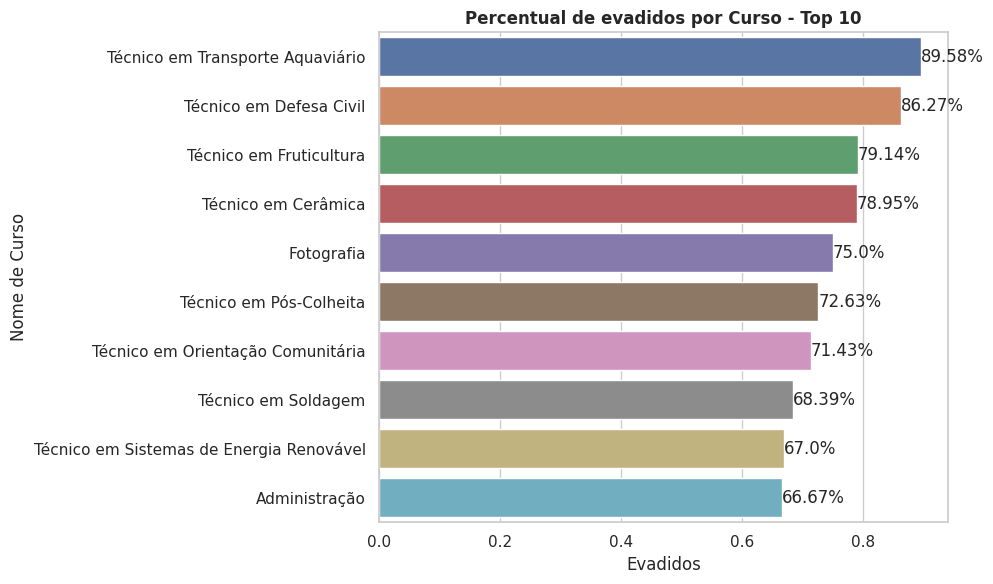

In [100]:
aux2 = pd.crosstab(data['Nome de Curso'],data['Categoria da Situação'], normalize='index').reset_index().sort_values('Evadidos', ascending=False)
aux2 = aux2[aux2['Evadidos']<1.000000]
plt.figure(figsize=(10, 6))
ax= sns.barplot(aux2.head(10),y='Nome de Curso',x='Evadidos', palette='deep')
ax.bar_label(ax.containers[0], fmt=lambda x:f'{round(x*100,2)}%')
plt.title("Percentual de evadidos por Curso - Top 10",
          fontweight='bold')
plt.tight_layout()

In [36]:
evadidos_ordenados=pd.crosstab(data['Unidade de Ensino'], data['Categoria da Situação'], normalize='index').reset_index().sort_values('Evadidos', ascending=False)
evadidos_ordenados=evadidos_ordenados[evadidos_ordenados['Evadidos']<1].head(20)

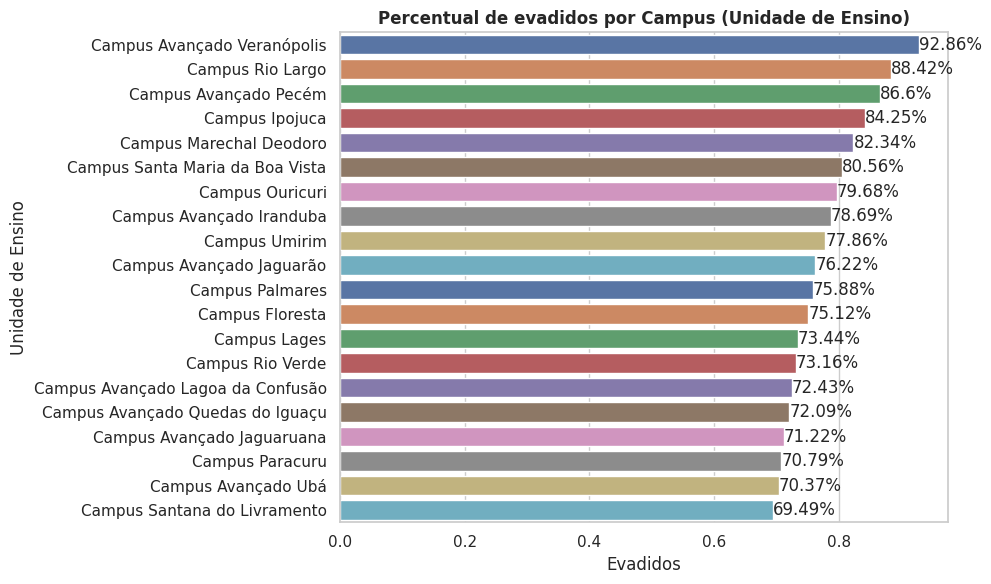

In [37]:
plt.figure(figsize=(10, 6))
ax= sns.barplot(evadidos_ordenados,y='Unidade de Ensino',x='Evadidos', palette='deep')
ax.bar_label(ax.containers[0], fmt=lambda x:f'{round(x*100,2)}%')
plt.title("Percentual de evadidos por Campus (Unidade de Ensino)",
          fontweight='bold')
plt.tight_layout()

In [38]:
uf_nova=pd.crosstab(data['UF'], data['Categoria da Situação'], normalize='index').reset_index().sort_values('Evadidos', ascending=False)
uf_nova=uf_nova[uf_nova['Evadidos']<1].head(20)

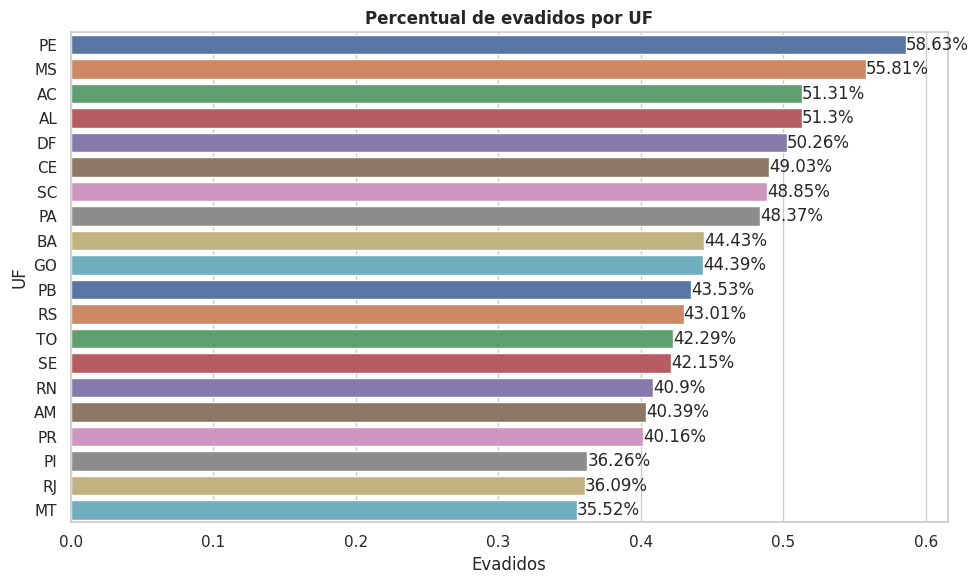

In [39]:
plt.figure(figsize=(10, 6))
ax= sns.barplot(uf_nova,y='UF',x='Evadidos', palette='deep')
ax.bar_label(ax.containers[0], fmt=lambda x:f'{round(x*100,2)}%')
plt.title("Percentual de evadidos por UF",
          fontweight='bold')
plt.tight_layout()

In [37]:
numerica.columns

Index(['Carga Horária', 'Código da Matrícula', 'Fator Esforço Curso', 'Idade'], dtype='object')

In [38]:
numerica.describe()

,Carga Horária,Código da Matrícula,Fator Esforço Curso,Idade
count,166140.000000,1.661400e+05,166140.00000,166140.000000
mean,3777.993096,7.719327e+07,1.15618,18.642278
std,524.051297,1.095186e+07,0.10188,2.160952
min,800.000000,3.410000e+02,1.00000,11.000000
25%,3467.000000,6.734609e+07,1.05300,18.000000
50%,3743.000000,7.250303e+07,1.18300,18.000000
75%,4040.000000,8.554955e+07,1.25000,19.000000
max,5700.000000,1.029088e+08,1.50000,81.000000


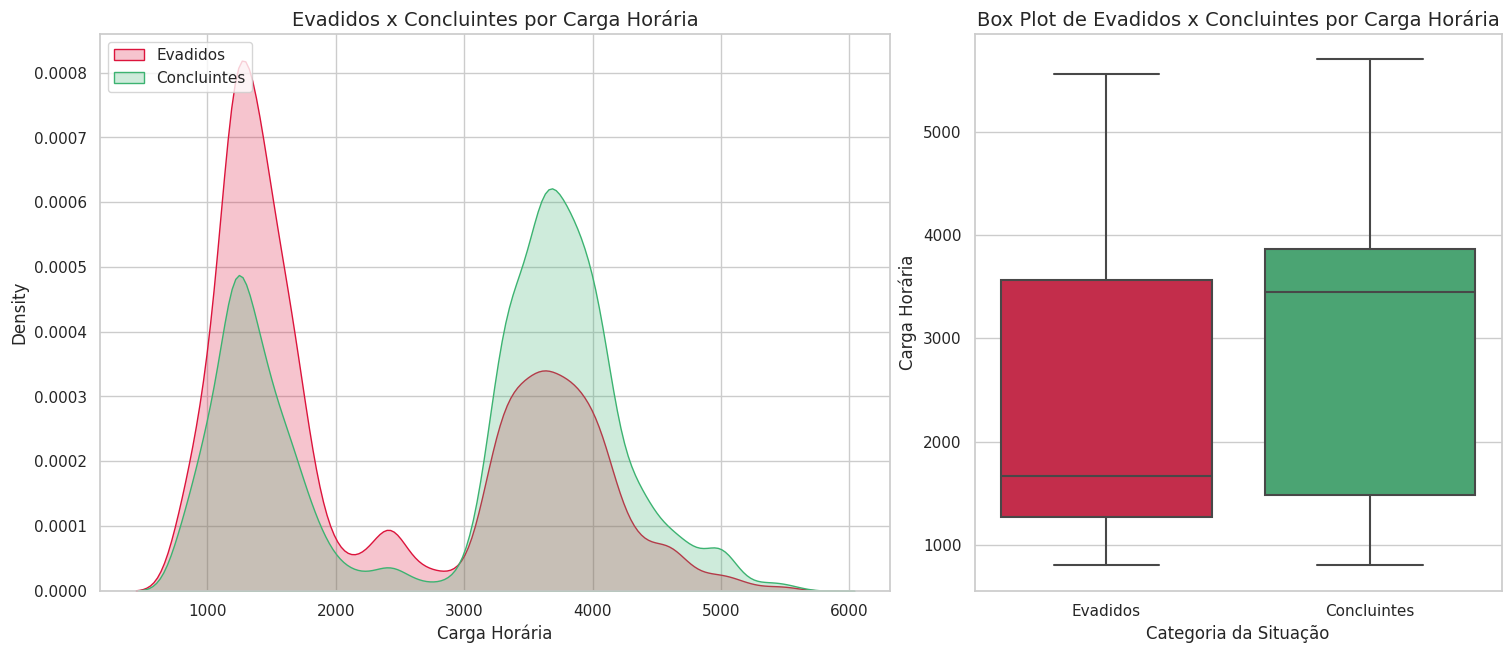

In [40]:
fig = plt.figure(constrained_layout=True, figsize=(15, 12))

gs = GridSpec(2, 5, figure=fig)
ax1 = fig.add_subplot(gs[0, :3])
ax2 = fig.add_subplot(gs[0, 3:])

sns.kdeplot(data[data['Categoria da Situação']=='Evadidos']['Carga Horária'], ax=ax1,
             color='crimson', shade=True, label='Evadidos')
sns.kdeplot(data[data['Categoria da Situação']=='Concluintes']['Carga Horária'], ax=ax1,
             color='mediumseagreen', shade=True, label='Concluintes')
ax1.set_title('Evadidos x Concluintes por Carga Horária', size=14)
ax1.legend(loc='upper left')

sns.boxplot(x='Categoria da Situação', y='Carga Horária', data=data, palette=['crimson', 'mediumseagreen'], ax=ax2)
ax2.set_title('Box Plot de Evadidos x Concluintes por Carga Horária', size=14)
fig.show()

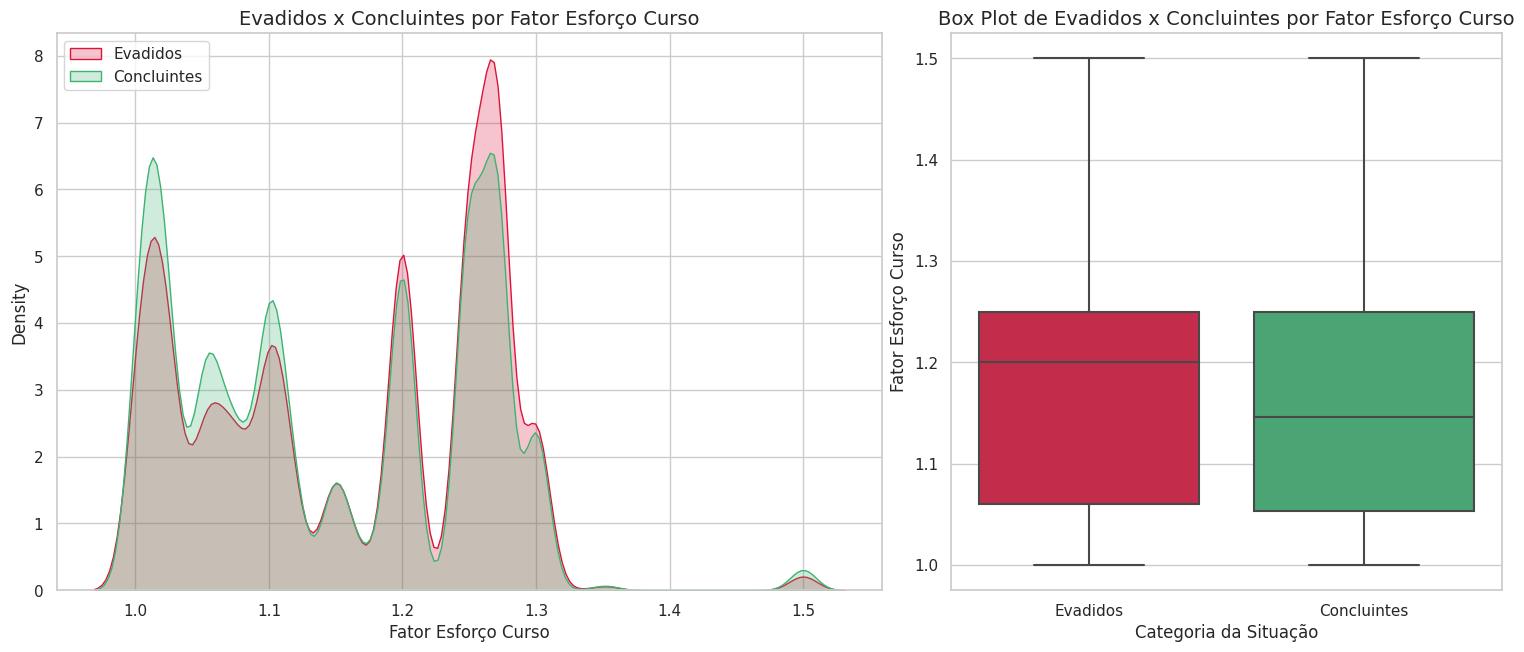

In [41]:
fig = plt.figure(constrained_layout=True, figsize=(15, 12))

gs = GridSpec(2, 5, figure=fig)
ax1 = fig.add_subplot(gs[0, :3])
ax2 = fig.add_subplot(gs[0, 3:])

sns.kdeplot(data[data['Categoria da Situação']=='Evadidos']['Fator Esforço Curso'], ax=ax1,
             color='crimson', shade=True, label='Evadidos')
sns.kdeplot(data[data['Categoria da Situação']=='Concluintes']['Fator Esforço Curso'], ax=ax1,
             color='mediumseagreen', shade=True, label='Concluintes')
ax1.set_title('Evadidos x Concluintes por Fator Esforço Curso', size=14)
ax1.legend(loc='upper left')

sns.boxplot(x='Categoria da Situação', y='Fator Esforço Curso', data=data, palette=['crimson', 'mediumseagreen'], ax=ax2)
ax2.set_title('Box Plot de Evadidos x Concluintes por Fator Esforço Curso', size=14)
fig.show()

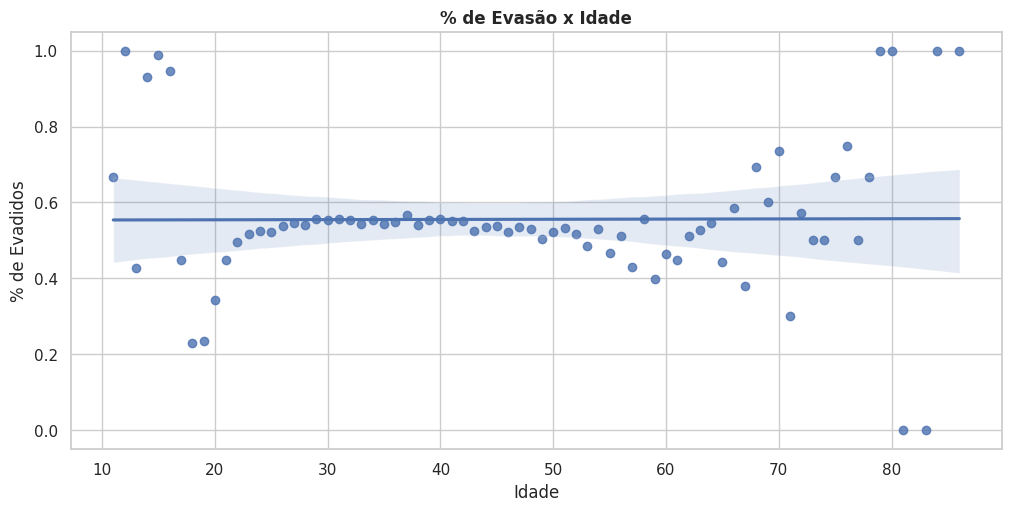

In [42]:
aux = pd.crosstab(data['Idade'],data['Categoria da Situação'], normalize='index').reset_index()
aux.rename(columns={'Evadidos':'% de Evadidos'}, inplace=True)
plt.figure(constrained_layout=True, figsize=(10, 5))
plt.title('% de Evasão x Idade',fontweight='bold')
sns.regplot(aux,x='Idade',y='% de Evadidos')
plt.show()

In [44]:
data['Data de Início do Ciclo'] = pd.to_datetime(data['Data de Início do Ciclo'])
data['Data de Fim Previsto do Ciclo'] = pd.to_datetime(data['Data de Fim Previsto do Ciclo'])
data['Mês de Ocorrência da Situação'] = pd.to_datetime(data['Mês de Ocorrência da Situação'])

In [63]:
data ['mes'] = data['Mês de Ocorrência da Situação'].dt.month_name(locale='pt_BR.utf8')

In [64]:
data['mes']

0         Janeiro
1         Janeiro
2         Janeiro
3         Janeiro
4         Janeiro
           ...   
282042    Janeiro
282043    Janeiro
282044    Janeiro
282045    Janeiro
282046    Janeiro
Name: mes, Length: 268916, dtype: object

In [67]:
ordem = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

In [68]:
data['mes'] = pd.Categorical(data['mes'], categories=ordem, ordered=True)

In [55]:
#data.drop(columns=['mes'], inplace=True)

In [70]:
aux1 = pd.crosstab(data['mes'],data['Categoria da Situação']).reset_index()

In [71]:
aux1

Categoria da Situação,mes,Concluintes,Evadidos
0,Janeiro,156423,104152
1,Fevereiro,236,398
2,Março,243,417
3,Abril,389,436
4,Maio,204,368
5,Junho,221,311
6,Julho,253,543
7,Agosto,85,320
8,Setembro,152,270
9,Outubro,174,311


Text(0.5, 1.0, 'Quantidade de Evadidos e Concluintes por mês do ano')

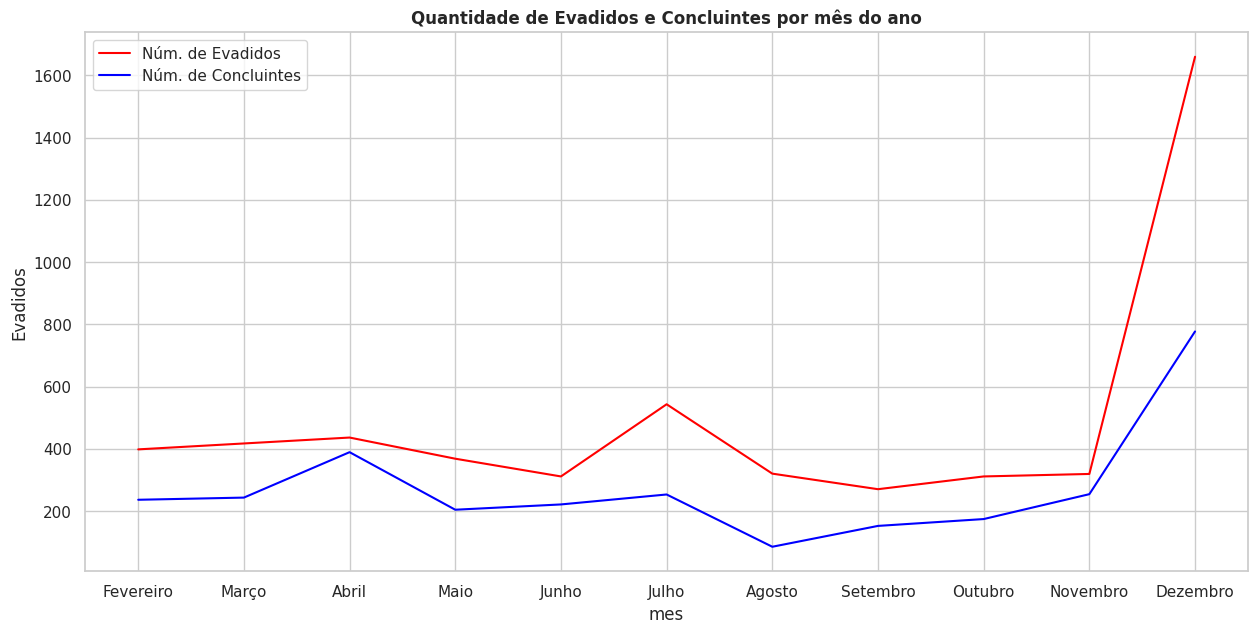

In [74]:
plt.figure(figsize=(15, 7))
sns.lineplot(aux1[aux1['mes']!='Janeiro'], x='mes',y='Evadidos',label='Núm. de Evadidos',color='red')
# for x, y in zip(aux1['mes'],aux1['Evadido']):
#  plt.text(x = x, 
#  y = y-15, 
#  s = '{:.0f}'.format(y), 
#  color = 'white').set_backgroundcolor('red') 

sns.lineplot(aux1[aux1['mes']!='Janeiro'], x='mes',y='Concluintes',label='Núm. de Concluintes',color='blue')
plt.title('Quantidade de Evadidos e Concluintes por mês do ano',fontweight='bold')

In [77]:
# plt.figure(figsize=(15, 7))
# show_bars(211, 'mes', 'Categoria da Situação', data[data['mes']=='Janeiro'], palette='Set1')
# plt.title('Evasão por mês de ocorrência',fontweight='bold')
# plt.margins(y=0.5)  
# plt.tight_layout()

## 4. Percepções

- A evasão nas regiões Sul e centro-Oeste possuem um indica mais elevado comparado com as demais regiões;
- Quanto ao sexo, o masulino apresenta o indice um poouco maior em comparação ao feminino;
- Por  renda familiar é perceptivel que quanto menor a renda maior o indice de evasão;
- A cor/raça mais afetada pela evasão são os pretos, pardos e indigenas;
- os turnos que possuem o maior indice de evasão são o noturno e o vespetino.
- As faixas etárias com maior indice de evasão estão entre 30 e 39 anos;
- Os campus umirim, Ouricuri, Avançado Resende e Rolante possuem o maior percentual de evasão,  todos com mais de 80%;
- MS, PE, AL e AC são os estados com maiores indices de evasão.
- A carga horária não tem influencia quanto a evasão;
- O fator esforço apresenta certa influencia na evasão do aluno.